In [46]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv("project datas/Phase 1/Linear Regression/train.csv")
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,6,6,5,3,5,3,7,4,4,...,3,6,8,5,4,6,5,5,4,0.475
1048571,1048571,5,4,4,5,5,4,5,3,6,...,3,4,6,3,3,4,4,10,4,0.495
1048572,1048572,3,5,5,9,5,6,1,4,5,...,8,5,3,5,3,6,5,7,6,0.500
1048573,1048573,4,4,2,3,4,7,11,3,3,...,6,3,7,1,5,7,5,6,4,0.450


In [48]:
y = df['FloodProbability'].to_numpy()
x = df.drop(['id', 'FloodProbability'], axis=1).to_numpy()

In [49]:
x.shape

(1048575, 20)

In [50]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    # Set the random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Determine the number of samples
    num_samples = X.shape[0]
    
    # Generate a list of indices
    indices = np.arange(num_samples)
    
    # Shuffle the indices randomly
    np.random.shuffle(indices)
    
    # Determine the split point
    split_index = int(num_samples * (1 - test_size))
    
    # Create training and testing indices
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    # Split the datasets
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
y_test

array([0.51 , 0.465, 0.525, ..., 0.42 , 0.485, 0.505])

In [52]:
weights = np.full(x_train.shape[1], 3, dtype=np.float64)
bias = 1
weights

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3.])

In [53]:
def linear_regression(alpha, bias, w, x, y):
    rows, columns = x.shape
    for i in range(rows):
        selected_row = x[i,:]
        predict = np.dot(selected_row, w) + bias
        real = y[i]
        for j in range(columns):
            w[j] -= selected_row[j] * (predict - real) * 2 * alpha
        bias -= (predict - real) * 2 * alpha
    return (w, bias)
    
    
    

In [54]:
w, b = linear_regression(0.001, bias, weights, x_train, y_train)
w, b

(array([0.0054586 , 0.00412535, 0.00540957, 0.00719467, 0.00557239,
        0.00571158, 0.00609524, 0.00533746, 0.00483474, 0.00653844,
        0.00777406, 0.00632768, 0.00650231, 0.00605811, 0.0059773 ,
        0.00497811, 0.0051026 , 0.00547861, 0.00588278, 0.0052825 ]),
 -0.055054417846537286)

In [55]:
df.corr()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,0.000394,-0.001846,-0.000946,-0.000063,0.001028,-0.000132,-0.000062,-0.000438,-0.000102,...,0.000965,-0.001526,0.000679,0.000115,-0.000189,0.001124,0.000590,-0.001674,0.000103,-0.000594
MonsoonIntensity,0.000394,1.000000,-0.007255,-0.007763,-0.007162,-0.009026,-0.008065,-0.008134,-0.007671,-0.008022,...,-0.009475,-0.010264,-0.009308,-0.008938,-0.008713,-0.009295,-0.006281,-0.008459,-0.008639,0.189259
TopographyDrainage,-0.001846,-0.007255,1.000000,-0.009952,-0.008854,-0.010346,-0.009383,-0.007322,-0.009779,-0.009123,...,-0.010169,-0.012047,-0.010209,-0.011338,-0.006912,-0.010687,-0.009857,-0.011831,-0.012422,0.187643
RiverManagement,-0.000946,-0.007763,-0.009952,1.000000,-0.008134,-0.012134,-0.008904,-0.008904,-0.010433,-0.010465,...,-0.011629,-0.010999,-0.009145,-0.011216,-0.005587,-0.006760,-0.010489,-0.009786,-0.011537,0.187202
Deforestation,-0.000063,-0.007162,-0.008854,-0.008134,1.000000,-0.011909,-0.007640,-0.009438,-0.011512,-0.009958,...,-0.010575,-0.012260,-0.009302,-0.010583,-0.008498,-0.011931,-0.011006,-0.010415,-0.010094,0.184420
Urbanization,0.001028,-0.009026,-0.010346,-0.012134,-0.011909,1.000000,-0.011329,-0.010701,-0.009895,-0.010301,...,-0.012813,-0.014122,-0.010867,-0.011672,-0.010336,-0.010975,-0.011101,-0.011341,-0.013116,0.181316
ClimateChange,-0.000132,-0.008065,-0.009383,-0.008904,-0.007640,-0.011329,1.000000,-0.008485,-0.009449,-0.011323,...,-0.009530,-0.013162,-0.008885,-0.009797,-0.006062,-0.010275,-0.009074,-0.010887,-0.011729,0.185311
DamsQuality,-0.000062,-0.008134,-0.007322,-0.008904,-0.009438,-0.010701,-0.008485,1.000000,-0.009389,-0.008833,...,-0.010423,-0.012325,-0.010335,-0.009468,-0.009915,-0.009497,-0.009814,-0.011535,-0.012708,0.187676
Siltation,-0.000438,-0.007671,-0.009779,-0.010433,-0.011512,-0.009895,-0.009449,-0.009389,1.000000,-0.010478,...,-0.010669,-0.011715,-0.009587,-0.009401,-0.006374,-0.008223,-0.008938,-0.008784,-0.008289,0.186914
AgriculturalPractices,-0.000102,-0.008022,-0.009123,-0.010465,-0.009958,-0.010301,-0.011323,-0.008833,-0.010478,1.000000,...,-0.011249,-0.011818,-0.010805,-0.009720,-0.008730,-0.009484,-0.011104,-0.010321,-0.011203,0.183365


In [56]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def predict(x, w, bias):
    return np.dot(x, w) + bias

y_pred = predict(x_test, w, b)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")


mean absolute error: 0.02047689972159174
mean squared error: 0.0005991824552429827


Mean Absolute Error: 0.020476841105410846
Mean Squared Error: 0.0005991797754569187
R2_score: 0.7701945197226334


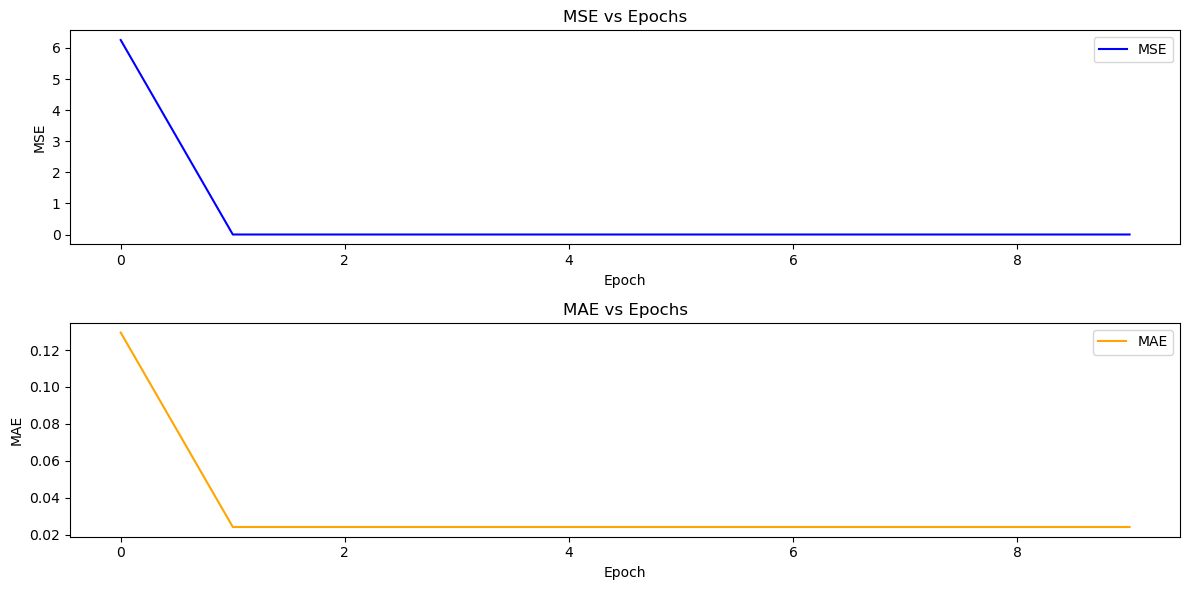

In [58]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def linear_regression(alpha, bias, w, x, y, epochs):
    rows, columns = x.shape
    mse_list = []
    mae_list = []
    
    for epoch in range(epochs):
        total_mse = 0
        total_mae = 0
        for i in range(rows):
            selected_row = x[i,:]
            predict = np.dot(selected_row, w) + bias
            real = y[i]
            for j in range(columns):
                w[j] -= selected_row[j] * (predict - real) * 2 * alpha
            bias -= (predict - real) * 2 * alpha
            
            total_mse += (predict - real) ** 2
            total_mae += abs(predict - real)  
            
        mse = total_mse / rows
        mae = total_mae / rows
        mse_list.append(mse)
        mae_list.append(mae)
    
    return (w, bias, mse_list, mae_list)

def predict(x, w, bias):
    return np.dot(x, w) + bias

def R2_score(ans, pred):
    ss_res = 0
    ss_tot = 0
    ans_mean = np.mean(ans)
    for i in range(len(ans)):
        ss_res += (ans[i] - pred[i]) ** 2
        ss_tot += (ans_mean - ans[i]) ** 2
    return 1 - (ss_res / ss_tot)
    
    
    
    
        
weights = np.full(x.shape[1], 20, dtype=np.float64)
bias = 15

epochs = 10 
alpha = 0.001
w, b, mse_list, mae_list = linear_regression(alpha, bias, weights, x_train, y_train, epochs)

y_pred = predict(x_test, w, b)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2_score: {R2_score(y_test, y_pred)}")

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(range(epochs), mse_list, label='MSE', color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epochs')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(epochs), mae_list, label='MAE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE vs Epochs')
plt.legend()

plt.tight_layout()  
plt.show()

In [39]:
test_df = pd.read_csv("project datas/Phase 1/Linear Regression/test.csv")
test_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5
